# MASTER - Notebook 4
### Matteo Grazioso 884055

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import json
import os
import folium
import warnings
warnings.filterwarnings('ignore')

import myfunctions as mf # Custom functions

In [22]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---------


In [23]:
def restrict_dataset_to_period(df, start_date, end_date):
    '''
    Restrict the dataset to only the specified period given by the user
        :param df: the dataset to be restricted
        :param start_date: the start date of the period
        :param end_date: the end date of the period
        :return: the restricted dataset        
    ''' 

    # Filter the dataset to only the specified period
    df = df[(df['DATA'] >= start_date) & (df['DATA'] <= end_date)]
    
    return df

In [24]:
# If does not exist a file named data/processed/dataset_cleaned_temp02-04_2023-02-21_2-esportazioneCompleta.txt create it
if not os.path.exists('data/processed/dataset_cleaned_temp02-04_2023-02-21_2-esportazioneCompleta.txt'):
    path = 'data/raw/2-esportazioneCompleta.txt'
    df = pd.read_csv(path, header=0, sep='\t')

    # Save the name of the file in a variable for future use extracting the name of the file from the path
    file_name = path.split('_')[-1].split('/')[2]

    # Convert the column 'DATA' to datetime format
    df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')

    # Display the first 5 rows of the dataframe
    print (df.head())

    # Print information about the dataset
    print('df.shape: ', df.shape)

    # Define the interval of dates to restrict the dataset
    start_date = '2023-02-04'
    end_date = '2023-02-21'
    df = restrict_dataset_to_period(df, start_date, end_date)

    # Export the data to a txt file
    name_file = 'restricted_' + str(start_date) + '_' + str(end_date) + '_' + file_name
    df.to_csv('data/raw/' + name_file, sep='\t', index=False)

    print('Data exported to ' + name_file)
else :
    print('Dataset restricted to the period: 2023-02-04 - 2023-02-21 already exists')
    print('Path: data/processed/dataset_cleaned_temp02-04_2023-02-21_2-esportazioneCompleta.txt')
    # Open the file
    df = pd.read_csv('data/processed/dataset_cleaned_temp02-04_2023-02-21_2-esportazioneCompleta.txt', sep='\t')
    # Print information about the dataset
    print('df.shape: ', df.shape)
    print('df.head(2)')
    print(df.head(2))

    # Print the interval of dates (DATA column) of the dataset
    # Min date
    print('Min date: ', df['DATA'].min())
    # Max date
    print('Max date: ', df['DATA'].max())

Dataset restricted to the period: 2023-02-04 - 2023-02-21 already exists
Path: data/processed/dataset_cleaned_temp02-04_2023-02-21_2-esportazioneCompleta.txt
df.shape:  (1657505, 9)
df.head(2)
         DATA       ORA     DATA_VALIDAZIONE     SERIALE  FERMATA  \
0  2023-02-20  08:45:00  2023-02-20 08:45:00 -4090155752     5072   
1  2023-02-05  07:46:00  2023-02-05 07:46:00 -4090155610     5026   

    DESCRIZIONE  TITOLO TICKET_CODE   DESCRIZIONE_TITOLO  
0      Chioggia   11209           7  BIGL RETE UNICA 75'  
1  Tronchetto F   11209           7  BIGL RETE UNICA 75'  
Min date:  2023-02-04
Max date:  2023-02-21


In [25]:
# This dataset must be cleaned before it can be used. The cleaning process is done in the following steps:
# 1. Execute the notebook 1_b_only_temp_cleaning.ipynb to clean the dataset deleting useless stamps once the algorithm has determined the minimum temporal gap between two consecutive stamps.

# The result of the cleaning process is a new dataset that must be used to obtain the dataset with geographical coordinates. This process is done in the following steps:
# 1. Execute the Notebook 3 AUX.ipynb to obtain the dataset with geographical coordinates.

In [26]:
# Open the dataset that has also the geo coordinates
# Find all txt files in the data folder
csv_file = mf.find_csv_files('data/processed/')

print("Select a dataset with geo coordinates from the list:")

# Choose a dataset from the list of txt files
selected_dataset = mf.choose_dataset(csv_file)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

Select a dataset with geo coordinates from the list:
The following files were found:
1. data/processed/esportazioneCompleta/df_esportazioneCompleta_GEO.csv
2. data/processed/esportazionePasqua23/df1_esportazionePasqua23_divided.csv
3. data/processed/esportazionePasqua23/df2_esportazionePasqua23_divided.csv
4. data/processed/esportazionePasqua23/df_esportazionePasqua23_GEO.csv
5. data/processed/esportazionePasqua23/df_esportazionePasqua23_part1_GEO.csv
6. data/processed/esportazionePasqua23/df_esportazionePasqua23_part2_GEO.csv
7. data/processed/temp_2-esportazioneCompleta/df_temp_2-esportazioneCompleta_GEO.csv
8. data/processed/validazioni/df_validazioni_GEO.csv
You selected the dataset data/processed/temp_2-esportazioneCompleta/df_temp_2-esportazioneCompleta_GEO.csv


In [27]:
df = pd.read_csv(path, header=0, sep=',')

# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('_')[1]
# If file_name has a slash, split it and take the first element
if '/' in file_name:
    file_name = file_name.split('/')[0]
subfolder = file_name
print(f"File name: {file_name}")

# Display the first 5 rows of the dataframe
df.head()

# Convert the column 'DATA' to datetime format
df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')

File name: 2-esportazioneCompleta


In [28]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,LATITUDE,LONGITUDE
0,2023-02-20,08:45:00,2023-02-20 08:45:00,-4090155752,5072,Chioggia,11209,7,BIGL RETE UNICA 75',45.223690,12.280678
1,2023-02-05,07:46:00,2023-02-05 07:46:00,-4090155610,5026,Tronchetto F,11209,7,BIGL RETE UNICA 75',45.440094,12.306348
2,2023-02-16,13:52:00,2023-02-16 13:52:00,-4090154961,5031,"P.le Roma ""G",11209,7,BIGL RETE UNICA 75',45.438667,12.319465
3,2023-02-16,15:17:00,2023-02-16 15:17:00,-4090154961,5039,"Rialto ""C""",11209,7,BIGL RETE UNICA 75',45.437584,12.335558
4,2023-02-16,13:29:00,2023-02-16 13:29:00,-4090154961,1329,Trieste Erac,11209,7,BIGL RETE UNICA 75',45.491853,12.242548


In [29]:
# Print the interval of dates for which we have data
print('Date range: {} to {}'.format(df['DATA'].min(), df['DATA'].max()))

Date range: 2023-02-04 00:00:00 to 2023-02-21 00:00:00


In [30]:
# For each stop, store the number of use for each ticket code
# Each stop is a point identified by the coordinates (latitude, longitude)

with open('data/dictionaries/dict_ticket_codes.json') as f:
        ticket_codes = json.load(f)

print('The ticket codes are: ', ticket_codes)

# Change 5-STUD, 6-STUD to STUD in the dataframe
df['TICKET_CODE'] = df['TICKET_CODE'].replace(['5-STUD', '6-STUD'], 'STUD')
# Change 5-WKRS, 6-WKRS to WKRS in the dataframe
df['TICKET_CODE'] = df['TICKET_CODE'].replace(['5-WKRS', '6-WKRS'], 'WKRS')
# Change 5-RET, 6-RET to RET in the dataframe
df['TICKET_CODE'] = df['TICKET_CODE'].replace(['5-RET', '6-RET'], 'RET')

# Print the unique ticket codes
# Print information about the changes made
print('The ticket codes 5-STUD and 6-STUD have been changed to STUD')
print('The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS')
print('The ticket codes 5-RET and 6-RET have been changed to RET')

# Convert all the ticket codes to string
df['TICKET_CODE'] = df['TICKET_CODE'].astype(str)

ticket_codes = df['TICKET_CODE'].unique()
# Sort the ticket codes
ticket_codes.sort()

print('The considered ticket codes are: ', ticket_codes)

# For each stop, store the number of visits for each ticket code
# Iterate over the stops dataframe and for each stop, store the number of visits for each ticket code
# Notice that a stop is a pair of coordinates (latitude, longitude)

# The columns of the dataframe are:
# ['DATA', 'ORA', 'DATA_VALIDAZIONE', 'SERIALE', 'FERMATA', 'DESCRIZIONE',
#        'TITOLO', 'TICKET_CODE', 'DESCRIZIONE_TITOLO', 'LATITUDE', 'LONGITUDE']

# Create a dataframe of stops
df_stop = df[['LATITUDE', 'LONGITUDE', 'TICKET_CODE']]

df_stop.head()


The ticket codes are:  {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', '4': 'Seven-day ticket', '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students', '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers', '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired', '6-WKRS': 'Annual ticket for workers', '7': '75 minutes ticket', '8': 'Other ticket'}
The ticket codes 5-STUD and 6-STUD have been changed to STUD
The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS
The ticket codes 5-RET and 6-RET have been changed to RET
The considered ticket codes are:  ['1' '2' '3' '5' '6' '7' 'STUD' 'WKRS']


,LATITUDE,LONGITUDE,TICKET_CODE
0,45.223690,12.280678,7
1,45.440094,12.306348,7
2,45.438667,12.319465,7
3,45.437584,12.335558,7
4,45.491853,12.242548,7


In [31]:
df_stop_count = df_stop.groupby(['LATITUDE', 'LONGITUDE', 'TICKET_CODE']).size().reset_index(name='COUNT')

df_stop_count.head(20)

,LATITUDE,LONGITUDE,TICKET_CODE,COUNT
0,45.223690,12.280678,1,464
1,45.223690,12.280678,2,69
2,45.223690,12.280678,3,47
3,45.223690,12.280678,5,1600
4,45.223690,12.280678,6,382
5,45.223690,12.280678,7,2757
6,45.223690,12.280678,STUD,256
7,45.223690,12.280678,WKRS,1
8,45.412113,12.359925,1,8
9,45.412113,12.359925,2,8


In [32]:
# Describe the column COUNT
df_stop_count['COUNT'].describe()

count       304.000000
mean       5452.319079
std       22646.219327
min           1.000000
25%         103.500000
50%         513.500000
75%        2425.000000
max      356489.000000
Name: COUNT, dtype: float64

In [33]:
# Pivot table for the ticket codes
df_stop_count = df_stop_count.pivot_table(index=['LATITUDE', 'LONGITUDE'], columns='TICKET_CODE', values='COUNT', fill_value=0)
df_stop_count.reset_index(inplace=True)

# For each stop (LATITUDE, LONGITUDE), change the counter of each ticket code as a percentage of the total number of tickets
for row in range(len(df_stop_count)):
    total = df_stop_count.iloc[row, 2:].sum()
    for col in range(2, len(df_stop_count.columns)):
        df_stop_count.iloc[row, col] = df_stop_count.iloc[row, col] / total * 100

In [34]:
df_stop_count

TICKET_CODE,LATITUDE,LONGITUDE,1,2,3,5,6,7,STUD,WKRS
0,45.223690,12.280678,8.321377,1.237446,0.842898,28.694405,6.850789,49.444046,4.591105,0.017934
1,45.412113,12.359925,12.307692,12.307692,12.307692,0.000000,1.538462,60.000000,1.538462,0.000000
2,45.417992,12.368725,4.376712,3.554884,5.409685,30.811726,22.547030,22.774557,10.185935,0.339470
3,45.418373,12.258713,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
4,45.419617,12.355350,26.732673,13.861386,18.811881,1.980198,0.000000,37.623762,0.990099,0.000000
5,45.425579,12.332047,10.973011,8.913352,20.028409,5.930398,1.065341,50.852273,2.237216,0.000000
6,45.426720,12.337905,14.300999,15.995007,27.728245,5.189016,1.212553,32.881598,2.692582,0.000000
7,45.429008,12.315648,5.419696,5.419696,6.840714,8.790482,1.883675,67.184402,4.461335,0.000000
8,45.429047,12.355934,6.057828,5.987306,9.710860,18.779972,9.675599,42.157969,7.630465,0.000000
9,45.429260,12.326280,9.224108,8.312774,13.226927,15.558129,9.349982,35.028448,9.289562,0.010070


In [35]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def haversine_distance(coord1, coord2):
    """
        Calculate the distance between two points on Earth using the haversine formula.
        The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.
        The haversin formula is specified as:
            a = sin²(Δlat/2) + cos(lat1).cos(lat2).sin²(Δlong/2)
            c = 2.atan2(√a, √(1−a))
            d = R.c
        where:
            lat1, long1 = Latitude and Longitude of point 1 (in decimal degrees)
            lat2, long2 = Latitude and Longitude of point 2 (in decimal degrees)
            R = Radius of the Earth in kilometers
            Δlat = lat2− lat1
            Δlong = long2− long1

        :param coord1: Tuple of (latitude, longitude) for point 1
        :param coord2: Tuple of (latitude, longitude) for point 2
        :return: Distance between the two coordinates in kilometers
    """
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert decimal degrees to radians
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    
    # Apply haversine formula
    # a = sin²(Δlat/2) + cos(lat1).cos(lat2).sin²(Δlong/2)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2

    # c = 2.atan2(√a, √(1−a))
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # d = R.c
    distance = R * c

    # print('Distance between stops: ', distance)
    return distance

def cosine_similarity_distance(counts1, counts2):
    # Calculate cosine similarity between two count vectors
    """
        Calculate the cosine similarity between two count vectors.
        The cosine similarity is a measure of similarity between two non-zero vectors of an inner product space 
        that measures the cosine of the angle between them.
        The cosine of 0° is 1, and it is less than 1 for any other angle.
        It is thus a judgement of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1,
        two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.
        The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in [0,1].
        The cosine similarity is mathematically defined as:
            cos(θ) = A.B / ||A||.||B||
        where:
            A.B = Dot product of A and B
            ||A|| = Euclidean norm of A
            ||B|| = Euclidean norm of B
        :param counts1: List of counts for each ticket code for stop 1
        :param counts2: List of counts for each ticket code for stop 2
        :return: Cosine similarity between the two count vectors

        # This function calls the cosine_similarity function from sklearn.metrics.pairwise to calculate the cosine similarity between two count vectors.
    """
    similarity_matrix = cosine_similarity([counts1], [counts2])
    similarity = 1 - similarity_matrix[0][0]
    
    # print('Similarity between stops: ', similarity)
    return similarity

def custom_distance(stop1, stop2, coord_weight, similarity_weight):
    """
        Calculate the custom distance between two stops.
        The custom distance is a weighted combination of the haversine distance between the two stops and the cosine similarity between the two stops.
        The custom distance is mathematically defined as:
            custom_distance = coord_weight * haversine_distance + similarity_weight * cosine_similarity_distance
        where:
            coord_weight = Weight for haversine distance
            similarity_weight = Weight for cosine similarity distance
        :param stop1: Tuple of (latitude, longitude, counts for each ticket code) for stop 1
        :param stop2: Tuple of (latitude, longitude, counts for each ticket code) for stop 2
        :param coord_weight: Weight for haversine distance
        :param similarity_weight: Weight for cosine similarity distance
        :return: Custom distance between the two stops
    """
    # Calculate distances
    # Calculate haversine distance between two stops
    coord_distance = haversine_distance((stop1[0], stop1[1]), (stop2[0], stop2[1]))
    # Calculate cosine similarity between two stops
    count_similarity = cosine_similarity_distance(stop1[2:], stop2[2:])
    
    # Combine distances with appropriate weights
    combined_distance = coord_weight * coord_distance + similarity_weight * count_similarity
    return combined_distance

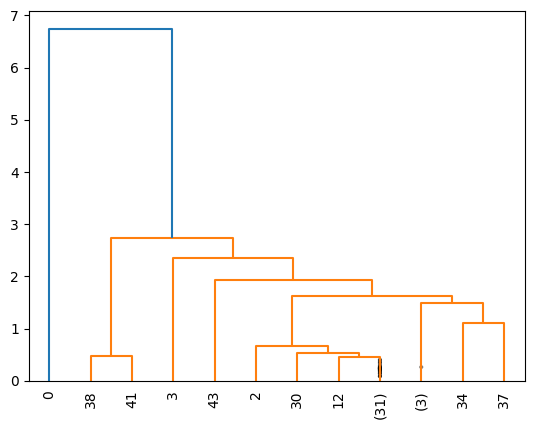

In [36]:
# df_count_stop is a df with columns [' LATITUDE ', ' LONGITUDE ', '1', '2', '3', '4', '5', '6', '7', 'STUD', 'RET', 'WKRS'] 
data = df_stop_count.values

# Custom distance function parameters
coord_weight = 0.3
similarity_weight = 0.7

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate linkage matrix using custom distance function
# The custom distance function is a weighted average of the haversine distance between coordinates and the similarity between the stop counts
linkage_matrix = linkage(data, method='single', metric=lambda x, y: custom_distance(x, y, coord_weight, similarity_weight))

# Create a dendrogram for visualization purposes 
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=10., show_contracted=True)

# Determine clusters based on a desired threshold or number of clusters
threshold = 0.4
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance', depth=2, R=None, monocrit=None)

# print(clusters)

In [37]:
# Adding cluster labels to the stop count dataframe
df_stop_count['Cluster'] = clusters
print(df_stop_count.shape)
df_stop_count.head()

(44, 11)


TICKET_CODE,LATITUDE,LONGITUDE,1,2,3,5,6,7,STUD,WKRS,Cluster
0,45.223690,12.280678,8.321377,1.237446,0.842898,28.694405,6.850789,49.444046,4.591105,0.017934,14
1,45.412113,12.359925,12.307692,12.307692,12.307692,0.000000,1.538462,60.000000,1.538462,0.000000,3
2,45.417992,12.368725,4.376712,3.554884,5.409685,30.811726,22.547030,22.774557,10.185935,0.339470,8
3,45.418373,12.258713,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,13
4,45.419617,12.355350,26.732673,13.861386,18.811881,1.980198,0.000000,37.623762,0.990099,0.000000,3


<Axes: xlabel='Cluster', ylabel='count'>

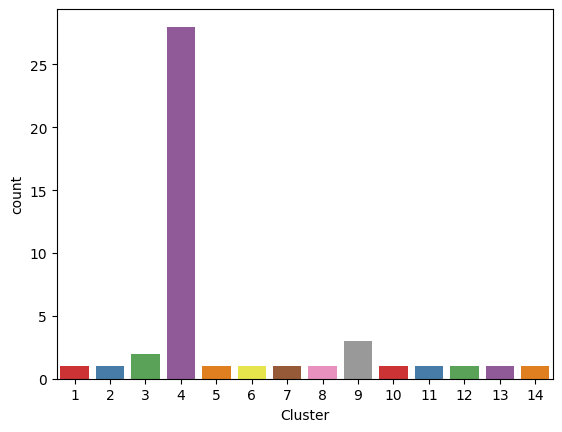

In [38]:
# Countplot of cluster distribution 
sns.countplot(x='Cluster', data=df_stop_count, palette='Set1')

In [39]:
# Create a folium map centered around the mean latitude and longitude
center_lat = np.mean(df_stop_count['LATITUDE'])
center_lon = np.mean(df_stop_count['LONGITUDE'])
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

cluster_colors = {
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'purple',
    5: 'orange',
    6: 'darkred',
    7: 'lightred',
    8: 'beige',
    9: 'darkblue',
    10: 'darkgreen',
    11: 'cadetblue',
    12: 'darkpurple',
    13: 'lightblue',
    14: 'pink',
    15: 'lightgreen',
    16: 'black',
    17: 'lightgray',
    18: 'darkgray',
    19: 'yellow',
    20: 'lightorange'
}

# Create markers for each stop and color them based on clusters
for idx, row in df_stop_count.iterrows():
    cluster_color = cluster_colors.get(row['Cluster'], 'gray')  # Default to gray if cluster color is not defined
    folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], radius=5, color=cluster_color).add_to(m)
    # Add a label to the marker with the name of the stop obtained by geo-coding the latitude and longitude
    # Obtain the name of the stop by geo-coding the latitude and longitude
    from geopy.geocoders import Nominatim
    geopy = Nominatim(user_agent="my-app3")
    location = geopy.reverse(f"{row['LATITUDE']}, {row['LONGITUDE']}")
    # Color the marker based on the cluster
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=location.address, icon=folium.Icon(color=cluster_color)).add_to(m)
m

In [40]:
# Export the map to an HTML file
time = datetime.now().strftime("%Y%m%d-%H%M%S")
try:
    m.save('map/' + file_name + '_clustered_' + time + '.html')
except:
    # Create a new folder in map folder
    os.mkdir('map/' + file_name)
    m.save('map/' + file_name + '/' + file_name + '_clustered_' + time + '.html')